In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import re
df_t = pd.read_csv('transcript_all.csv')
df_p = pd.read_csv('product_all.csv')
df_c = df_t.groupby('chat_id').text.apply(' '.join)

# Tokenize chats
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

txt = df_c.apply(lambda s: tokenizer.tokenize(s.lower()))

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [3]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

porter_stemmer = PorterStemmer()
def stem_words(l):
    return [porter_stemmer.stem(words) for words in l]

txt_list = list(map(stem_words,txt))

In [4]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize_words(l):
    return [wordnet_lemmatizer.lemmatize(words) for words in l]

txt_list = list(map(lemmatize_words,txt_list))

In [5]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['hello', 'hi', 'welcom', 'headout', 'know', 'experi', 'refer', 'help', 'ani', 'chat', 'problem', 'may', 'reach', 'need', 'let', 'u', 'feel', 'free', 'contact', 'realli', 'appreci', 'could', 'rate', 'chat', 'thank', 'today', 'wa', 'nice', 'talk', 'great', 'day', 'goodby', 'would', 'like','plea', 'wait', 'minut', 'check', 'thi', 'anyth', 'el', 'step', 'away', 'assist', 'custom', 'bye', 'hey', 'ok','get', 'ye', 'safari', 'khalifa', 'burj', 'aquarium', 'roman', 'palatin', 'vatican', 'dubai'])
def remove_stopwords(l):
    return [word for word in l if word not in stop_words]
txt_list = list(map(remove_stopwords,txt_list))

In [74]:
def remove_int(l):
    return [word for word in l if not word.isdigit()]
txt_list = list(map(remove_int,txt_list))

In [6]:
import gensim
id2word = gensim.corpora.Dictionary(txt_list)
corpus = [id2word.doc2bow(text) for text in txt_list]

In [50]:
def compute_perplexity(dictionary, corpus, texts, limit, start, step):
    perplexity = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                               random_state=6,
                                               alpha=1,
                                               eta=2)
        model_list.append(model)
        perplexity.append(model.log_perplexity(corpus))

    return model_list, perplexity

In [84]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                               random_state=100,
                                               alpha=1,
                                               eta=1)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [85]:
%%time
#==================================================
# Warning Long time to run!
#================================================== 
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=txt_list, start=1, limit=100, step=1)

CPU times: user 14min 57s, sys: 35.8 s, total: 15min 33s
Wall time: 27min 24s


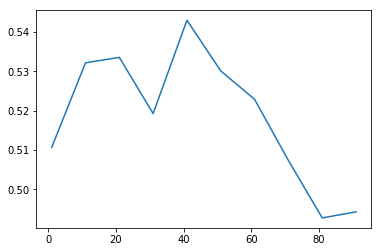

In [87]:
limit=100; start=1; step=10;
x = range(start, limit, step)
plt.plot(x, coherence)
plt.show()

In [58]:
%%time
#==================================================
# Warning Long time to run!
#================================================== 
model_list, coherence = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=txt_list, start=1, limit=100, step=10)

CPU times: user 1min 25s, sys: 3.5 s, total: 1min 29s
Wall time: 2min 34s


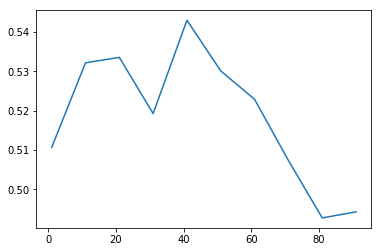

In [59]:
limit=100; start=1; step=10;
x = range(start, limit, step)
plt.plot(x, coherence)
plt.show()

In [16]:
import matplotlib.pyplot as plt

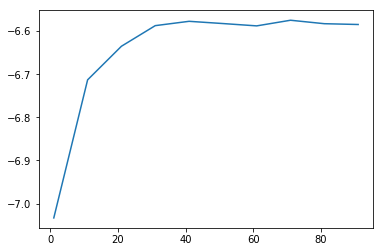

In [46]:
limit=100; start=1; step=10;
x = range(start, limit, step)
plt.plot(x, perplexity)
plt.show()

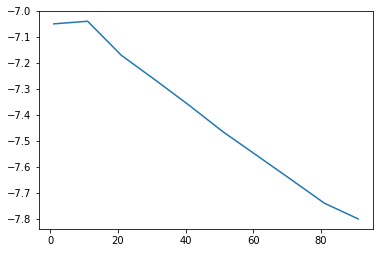

In [52]:
limit=100; start=1; step=10;
x = range(start, limit, step)
plt.plot(x, perplexity)
plt.show()

In [22]:
alpha=1e-5, eta=5e-1

NameError: name 'model' is not defined

In [82]:
%%time
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=1,
                                           eta=1,
                                           per_word_topics=True)

CPU times: user 57.2 s, sys: 1.72 s, total: 58.9 s
Wall time: 29.5 s


In [83]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15    -0.207029  0.072338       1        1  13.378479
17    -0.259049  0.011744       2        1  13.336624
10    -0.140053  0.010311       3        1   8.264894
11    -0.170458  0.053537       4        1   7.351286
12    -0.088964 -0.230279       5        1   7.329068
1     -0.136909 -0.035410       6        1   6.282641
14    -0.127242  0.177006       7        1   6.041105
5     -0.064940 -0.173248       8        1   5.833708
19    -0.149085  0.165230       9        1   5.619095
3     -0.038992 -0.134962      10        1   5.520761
18    -0.000524 -0.089211      11        1   4.621391
4      0.178438  0.068853      12        1   3.124012
0      0.089534 -0.031792      13        1   3.077772
6      0.116460 -0.024356      14        1   2.339190
16     0.145697  0.006938      15        1   1.979129
13     0.177614  0.035463      16        1   1.487284
2      0.165528  0.027345      17        1   1.308403
9      0.165473  0.027474      18        1   1.094955
8      0.166154  0.030740      19        1   1.054543
7      0.178347  0.032279      20        1   0.955663, topic_info=     Category          Freq       Term         Total  loglift  logprob
term                                                                  
2     Default  23674.000000     ticket  23674.000000  30.0000  30.0000
53    Default  11433.000000       tour  11433.000000  29.0000  29.0000
237   Default   7869.000000       seat   7869.000000  28.0000  28.0000
31    Default   8760.000000       time   8760.000000  27.0000  27.0000
123   Default   5043.000000        tri   5043.000000  26.0000  26.0000
38    Default   4835.000000        com   4835.000000  25.0000  25.0000
0     Default   4310.000000        buy   4310.000000  24.0000  24.0000
41    Default   3537.000000       http   3537.000000  23.0000  23.0000
204   Default   4908.000000        use   4908.000000  22.0000  22.0000
111   Default   2829.000000      cruis   2829.000000  21.0000  21.0000
184   Default   4530.000000      price   4530.000000  20.0000  20.0000
227   Default   3643.000000       line   3643.000000  19.0000  19.0000
4     Default   6561.000000      avail   6561.000000  18.0000  18.0000
183   Default   2968.000000        pas   2968.000000  17.0000  17.0000
5     Default  14874.000000       book  14874.000000  16.0000  16.0000
15    Default   4835.000000       show   4835.000000  15.0000  15.0000
629   Default   3050.000000       guid   3050.000000  14.0000  14.0000
334   Default   4047.000000      email   4047.000000  13.0000  13.0000
57    Default   2699.000000        www   2699.000000  12.0000  12.0000
7     Default   4405.000000       date   4405.000000  11.0000  11.0000
139   Default   2451.000000       pick   2451.000000  10.0000  10.0000
343   Default   3854.000000     reserv   3854.000000   9.0000   9.0000
316   Default   3354.000000       card   3354.000000   8.0000   8.0000
231   Default   2452.000000       skip   2452.000000   7.0000   7.0000
119   Default   2906.000000    purchas   2906.000000   6.0000   6.0000
413   Default   2545.000000   discount   2545.000000   5.0000   5.0000
120   Default   3362.000000     select   3362.000000   4.0000   4.0000
1207  Default   1537.000000         la   1537.000000   3.0000   3.0000
1     Default   1900.000000      child   1900.000000   2.0000   2.0000
686   Default   1479.000000      tower   1479.000000   1.0000   1.0000
...       ...           ...        ...           ...      ...      ...
2535  Topic20     21.745031        8am     41.908318   3.9944  -5.9421
9650  Topic20     15.641517     cutoff     34.758213   3.8520  -6.2715
5346  Topic20     15.732450       coat     35.046219   3.8496  -6.2657
8716  Topic20     19.500507      varga     49.376785   3.7215  -6.0510
8713  Topic20     19.500507     monroy     49.376785   3.7215  -6.0510
3722  Topic20     36.735973     invoic    101.258682   3.6366  -5.4177


In [25]:
import pyLDAvis
import pyLDAvis.gensim  
%matplotlib inline

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/funcy/colls.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, Set, Iterable, Iterator, defaultdict
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/funcy/flow.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Hashable


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
18     0.167037  0.026907       1        1  10.594687
19     0.100714 -0.130273       2        1   8.465080
14     0.237340  0.087217       3        1   8.381773
15    -0.034834 -0.069127       4        1   5.733062
5      0.151472 -0.149316       5        1   5.623116
11    -0.098133 -0.092855       6        1   5.238660
2      0.113456 -0.069317       7        1   5.085950
8     -0.162250 -0.071443       8        1   4.858263
6      0.120384 -0.115375       9        1   4.693779
3      0.078226 -0.123696      10        1   4.600236
1      0.086230  0.226257      11        1   4.350585
17    -0.025904 -0.078289      12        1   4.241977
9     -0.070217 -0.027218      13        1   4.233171
4     -0.076277 -0.089837      14        1   4.047496
0      0.127012  0.192944      15        1   4.009615
13    -0.164633  0.033040      16        1   3.578023
10    -0.149460 -0.055795      17        1   3.502062
16    -0.187986  0.087646      18        1   2.953787
7     -0.232333  0.122010      19        1   2.939631
12     0.020156  0.296519      20        1   2.869044, topic_info=     Category          Freq      Term         Total  loglift  logprob
term                                                                 
3     Default  27107.000000    ticket  27107.000000  30.0000  30.0000
258   Default   8687.000000      seat   8687.000000  29.0000  29.0000
33    Default   9580.000000      time   9580.000000  28.0000  28.0000
57    Default  12239.000000      tour  12239.000000  27.0000  27.0000
16    Default   5508.000000      show   5508.000000  26.0000  26.0000
132   Default   5402.000000       tri   5402.000000  25.0000  25.0000
6     Default  16922.000000      book  16922.000000  24.0000  24.0000
5     Default   7377.000000     avail   7377.000000  23.0000  23.0000
42    Default   5414.000000       com   5414.000000  22.0000  22.0000
338   Default   4121.000000      card   4121.000000  21.0000  21.0000
120   Default   3518.000000     cruis   3518.000000  20.0000  20.0000
45    Default   3915.000000      http   3915.000000  19.0000  19.0000
8     Default   4932.000000      date   4932.000000  18.0000  18.0000
223   Default   5656.000000       use   5656.000000  17.0000  17.0000
1     Default   4835.000000       buy   4835.000000  16.0000  16.0000
711   Default   3266.000000        pm   3266.000000  15.0000  15.0000
248   Default   3846.000000      line   3846.000000  14.0000  14.0000
357   Default   4507.000000     email   4507.000000  13.0000  13.0000
201   Default   5046.000000     price   5046.000000  12.0000  12.0000
115   Default   6461.000000         2   6461.000000  11.0000  11.0000
455   Default   3744.000000         1   3744.000000  10.0000  10.0000
366   Default   4296.000000    reserv   4296.000000   9.0000   9.0000
672   Default   3109.000000      guid   3109.000000   8.0000   8.0000
20    Default   3284.000000        30   3284.000000   7.0000   7.0000
200   Default   3136.000000       pas   3136.000000   6.0000   6.0000
61    Default   2984.000000       www   2984.000000   5.0000   5.0000
439   Default   2962.000000  discount   2962.000000   4.0000   4.0000
149   Default   2704.000000      pick   2704.000000   3.0000   3.0000
999   Default   2319.000000        de   2319.000000   2.0000   2.0000
102   Default   8117.000000     sorri   8117.000000   1.0000   1.0000
...       ...           ...       ...           ...      ...      ...
4714  Topic20    372.393646        un    373.053619   3.5494  -4.2679
3115  Topic20    344.544250      hola    345.204224   3.5493  -4.3456
6569  Topic20    337.137604       con    337.797577   3.5492  -4.3673
2579  Topic20    312.329437        mi    312.989410   3.5491  -4.4438
6964  Topic20    293.576355   reserva    294.236328   3.5489  -4.5057
63    Topic20    272.770935        14    273.430908   3.5488  -4.5792
106   Topic20    245.670364       thx  

In [62]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
15     0.029100  0.091739       1        1  7.163287
18    -0.093094 -0.029817       2        1  6.999793
8      0.152331  0.159142       3        1  6.634966
0      0.034052  0.248945       4        1  6.508409
7     -0.172302 -0.017626       5        1  6.072493
14    -0.262819 -0.047558       6        1  6.065559
16    -0.115930 -0.041086       7        1  5.860343
19    -0.071951  0.051119       8        1  5.773958
2     -0.105653  0.019302       9        1  5.570476
6      0.073213  0.255106      10        1  5.315005
17     0.144144 -0.000144      11        1  4.806269
4      0.073468  0.048501      12        1  4.741164
3     -0.170835 -0.050057      13        1  4.570749
5     -0.200884 -0.031561      14        1  4.531536
10     0.090173 -0.098431      15        1  3.950078
11     0.061768  0.077344      16        1  3.725361
13     0.150333 -0.221610      17        1  3.311715
12     0.149811 -0.122294      18        1  3.298840
1      0.114814 -0.160573      19        1  2.630379
9      0.120263 -0.130441      20        1  2.469620, topic_info=     Category          Freq       Term         Total  loglift  logprob
term                                                                  
3     Default  26931.000000     ticket  26931.000000  30.0000  30.0000
6     Default  17774.000000       book  17774.000000  29.0000  29.0000
57    Default  12608.000000       tour  12608.000000  28.0000  28.0000
258   Default   8766.000000       seat   8766.000000  27.0000  27.0000
33    Default   9335.000000       time   9335.000000  26.0000  26.0000
102   Default   7661.000000      sorri   7661.000000  25.0000  25.0000
5     Default   7052.000000      avail   7052.000000  24.0000  24.0000
42    Default   5372.000000        com   5372.000000  23.0000  23.0000
338   Default   4063.000000       card   4063.000000  22.0000  22.0000
223   Default   5545.000000        use   5545.000000  21.0000  21.0000
80    Default   5320.000000         go   5320.000000  20.0000  20.0000
109   Default   7364.000000       want   7364.000000  19.0000  19.0000
1     Default   4810.000000        buy   4810.000000  18.0000  18.0000
8     Default   4669.000000       date   4669.000000  17.0000  17.0000
45    Default   3932.000000       http   3932.000000  16.0000  16.0000
357   Default   4413.000000      email   4413.000000  15.0000  15.0000
132   Default   5381.000000        tri   5381.000000  14.0000  14.0000
248   Default   3959.000000       line   3959.000000  13.0000  13.0000
16    Default   5416.000000       show   5416.000000  12.0000  12.0000
120   Default   3386.000000      cruis   3386.000000  11.0000  11.0000
115   Default   6481.000000          2   6481.000000  10.0000  10.0000
200   Default   3254.000000        pas   3254.000000   9.0000   9.0000
46    Default   3092.000000     includ   3092.000000   8.0000   8.0000
201   Default   5162.000000      price   5162.000000   7.0000   7.0000
61    Default   2996.000000        www   2996.000000   6.0000   6.0000
672   Default   3312.000000       guid   3312.000000   5.0000   5.0000
128   Default   3237.000000    purchas   3237.000000   4.0000   4.0000
439   Default   2821.000000   discount   2821.000000   3.0000   3.0000
149   Default   2637.000000       pick   2637.000000   2.0000   2.0000
366   Default   4122.000000     reserv   4122.000000   1.0000   1.0000
...       ...           ...        ...           ...      ...      ...
1813  Topic20    271.701904          è    272.364502   3.6987  -4.4332
5200  Topic20    258.417938    pompeii    259.080536   3.6985  -4.4833
327   Topic20    250.980270       room    251.642883   3.6985  -4.5125
6121  Topic20    246.827881     amalfi    247.490494   3.6984  -4.5292
1572  Topic20    238.254227   accommod    238.916840   3.6983  -4.5646
1875  Topic20    225.125641      resid    225.788254   3.6982  -4.6212
7583  Topic20    219.2

In [90]:
def format_topics_sentences(ldamodel, corpus, texts):

    sent_topics_df = pd.DataFrame()


    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    sent_topics_df = pd.concat([sent_topics_df, texts], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(lda_model, corpus, df_c.reset_index(drop=True))


df_topic = df_topic_sents_keywords.reset_index()
df_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [91]:
df_topic.Keywords[:1000].value_counts()

cruis, tower, pari, eiffel, versail, palac, summit, sagrada, 2nd, sein       160
time, book, avail, date, pm, onli, hour, sorri, back, look                   137
email, reserv, book, receiv, sorri, confirm, number, cancel, send, refund    136
seat, show, select, avail, section, price, best, offic, togeth, exact         90
tour, com, http, www, link, citi, product, top, unit, packag                  69
pas, combo, park, singapor, attract, world, ride, valid, night, includ        67
price, child, adult, offer, year, much, book, fee, kid, allow                 66
use, code, credit, discount, book, card, coupon, log, accept, cashback        59
ticket, buy, purchas, onlin, show, onli, go, host, websit, venu               52
tri, card, use, work, book, differ, complet, anoth, error, issu               46
pick, hotel, transfer, point, locat, trip, start, drop, meet, place           45
desert, dinner, dhow, live, 4x4, even, ride, dune, n, entertain               27
tour, line, guid, skip, acce

In [89]:
df_topic.Keywords[:1000].value_counts()

ticket, buy, show, purchas, broadway, host, 2, onlin, tonight, theatr           200
avail, date, tri, book, week, look, websit, onli, month, tell                    72
seat, select, price, section, best, avail, show, choos, offic, exact             66
email, receiv, cancel, reserv, send, confirm, number, refund, order, ticket      65
pas, combo, park, singapor, valid, visit, attract, world, sentosa, zoo           59
book, want, make, reserv, unfortun, onlin, onli, websit, possibl, one            50
time, 30, pm, hour, 10, septemb, 00, slot, 9, 8                                  50
ticket, 2, price, child, adult, 3, year, 4, kid, 1                               49
pick, hotel, point, locat, transfer, drop, palac, place, mention, provid         48
use, discount, code, offer, coupon, log, cashback, websit, facebook, credit      48
tour, com, http, cruis, www, link, citi, interest, unit, arab                    46
tour, line, guid, skip, museum, ticket, tower, access, colosseum, pari      

In [68]:
for s in df_topic.loc[df_topic.Dominant_Topic ==6].Text:
    print(s)
    print('\n')

Hello. How may I help you? Hi! How are! My child is 4 Do i need to buy a ticket Hello?  Hello. How may I help you? Hi! How are! My child is 4 Do i need to buy a ticket Hello?  Hello. How may I help you? Hi! How are! My child is 4 Do i need to buy a ticket Hello?  Hello. How may I help you? Hi! How are! My child is 4 Do i need to buy a ticket Hello? 


Hello. How may I help you? HELLO   IS IT ALLOW  10 YEAR GIRL TO DO QUAD BIKING  ON YOUR DESERT SAFARI EXPERIENCE The Minimum age for driving is 15 yrs kk thanks Hello. How may I help you? HELLO   IS IT ALLOW  10 YEAR GIRL TO DO QUAD BIKING  ON YOUR DESERT SAFARI EXPERIENCE The Minimum age for driving is 15 yrs kk thanks Hello. How may I help you? HELLO   IS IT ALLOW  10 YEAR GIRL TO DO QUAD BIKING  ON YOUR DESERT SAFARI EXPERIENCE The Minimum age for driving is 15 yrs kk thanks


Hello. How may I help you? hello  can we take 11 years girl on Quad bike with an adult?? Unfortunately not, they would need to be 15 years old, minumum kk thanks